In [ ]:
import lmfit.models
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from lmfit import models

In [22]:
df = pd.read_csv("../data/squat.csv")
df

,stance width,impulse,error
0,0,161.170658,6.005381
1,10,171.565045,3.825325
2,20,171.038662,3.080887
3,30,175.302728,5.350336
4,40,193.371009,6.911534
5,50,177.071976,0.703771
6,60,188.268868,7.498550
7,70,184.368025,4.715182
8,80,170.993129,2.384634


In [23]:
x = df['stance width']
y = df['impulse']
err = df['error']

Text(0, 0.5, 'Impulse (kg m / s)')

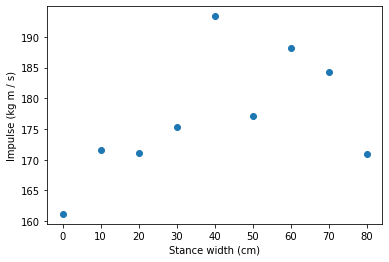

In [24]:
plt.scatter(x, y)
plt.xlabel("Stance width (cm)")
plt.ylabel("Impulse (kg m / s)")

In [31]:
lin_model = models.LinearModel()
first_guess_lm = lin_model.guess(y, x)
first_guess_lm['slope'].value = 0
first_guess_lm['slope'].vary = False

In [32]:
fit_lm = lin_model.fit(y, x=x, weights=1 / err, params=first_guess_lm)
fit_lm

3.5677009669350737

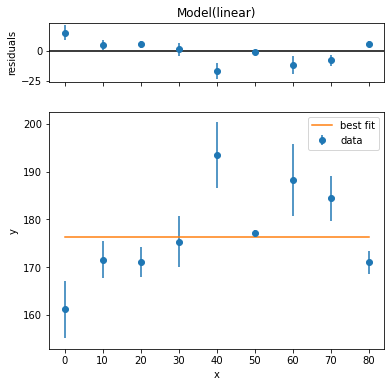

In [39]:
fit_lm.plot(numpoints=50)

<AxesSubplot:title={'center':'Model(Polynomial model)'}, xlabel='x', ylabel='y'>

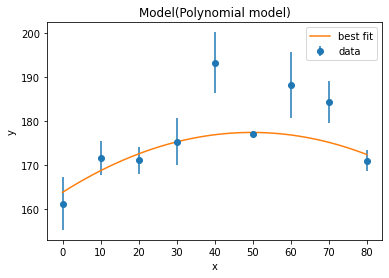

In [38]:
poly_f = lambda x, x0, a, b: a + b * (x - x0) ** 2
poly_model = models.Model(poly_f, name="Polynomial model")

fit_pm = poly_model.fit(y, x=x, weights=1 / err, x0=0, a=0, b=0)

fit_pm.plot_fit(numpoints=50)

In [40]:
print(f"Linear fit redchi: {fit_lm.redchi}")
print(f"Polynomial fit redchi: {fit_pm.redchi}")

Linear fit redchi: 3.5677009669350737
Polynomial fit redchi: 2.2303201823899426
